## SVD on MNIST
##### 2022-07-15

In [7]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot

(x, y), _ = mnist.load_data()

In [8]:
x_three = x[y == 3]

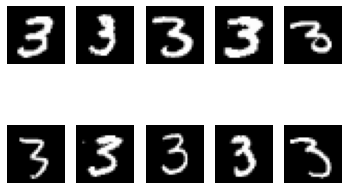

In [9]:
for i in range(10):
    pyplot.subplot(2, 5, i + 1)
    pyplot.imshow(x_three[i], cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off')

In [10]:
noise = np.round(np.random.random(list(x_three.shape)) * (x_three.max()+1)) - (x_three.max()+1)/2
dirty_x_three = x_three + noise
dirty_x_three[dirty_x_three > x_three.max()] = x_three.max()
dirty_x_three[dirty_x_three < x_three.min()] = x_three.min()

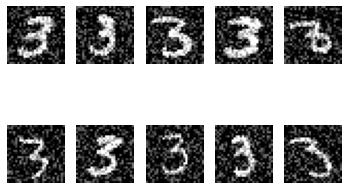

In [11]:
for i in range(10):
    pyplot.subplot(2, 5, i + 1)
    pyplot.imshow(dirty_x_three[i], cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off')

In [12]:
x_three_flat = dirty_x_three.reshape((dirty_x_three.shape[0], -1))

In [13]:
U, S, V = np.linalg.svd(x_three_flat)

In [15]:
x_three_reconstructed = np.dot(U[:, :5], np.dot(np.diag(S[:5]), V[:5, :]))
x_three_reconstructed = x_three_reconstructed.reshape((x_three_reconstructed.shape[0], 28, 28))

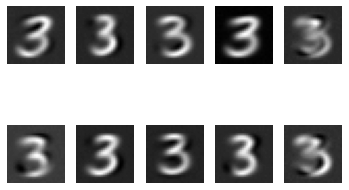

In [16]:
for i in range(10):
    pyplot.subplot(2, 5, i + 1)
    pyplot.imshow(x_three_reconstructed[i], cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off')